<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Taller2_IEEE754_ParteII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda parte taller IEEE 754
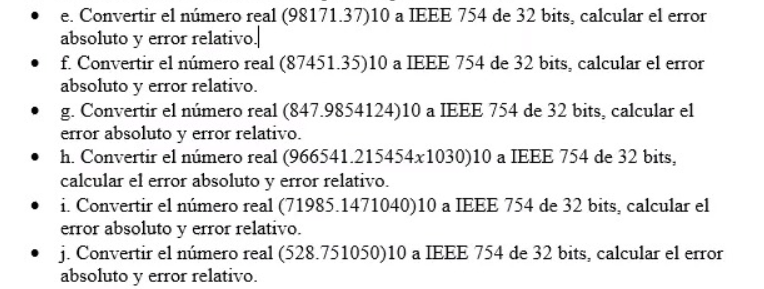

# Programa que recibe un número real y lo regresa escrito en el formato IEEE754

La razón que utilice para programar el error absoluto y error relativo es este
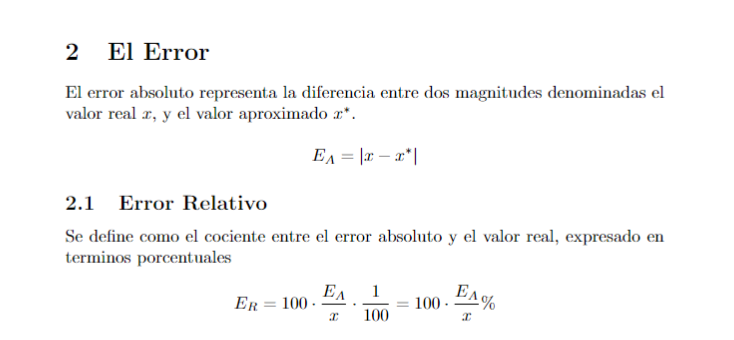

# Razón de la modificación de la función REAL2IEEE respecto el numero 966541.215454e30

Es importante tener en cuenta que este número es extremadamente grande y está fuera del rango de representación de punto flotante de 32 bits del formato IEEE 754, entonces el primer código, al utilizar operaciones matemáticas, puede manejar números más grandes, ya que realiza los cálculos directamente sobre el número en punto flotante. Sin embargo, el codigo proporcionado por el docente, al dividir el número real en su parte entera y fraccionaria, puede generar resultados incorrectos o no manejar adecuadamente un número tan grande.

In [ ]:
def convertir_IEEE_a_float(IEEE):
    """
    Convierte un número en formato IEEE 754 de 32 bits a su valor de punto flotante correspondiente.

    Parámetros:
        IEEE (str): La representación binaria del número en formato IEEE 754.

    Retorna:
        float: El valor de punto flotante correspondiente al número en formato IEEE 754.
      """
    signo = -1 if IEEE[0] == '1' else 1
    exponente = int(IEEE[1:9], 2) - 127
    mantisa = 1 + sum(int(IEEE[i]) * 2 ** -(i - 9) for i in range(9, 32))
    return signo * mantisa * 2 ** exponente

def calcular_error_absoluto(valor_aproximado, valor_original):
    return abs(valor_aproximado - valor_original)

def calcular_error_relativo(valor_aproximado, valor_original):
    return (abs(valor_aproximado - valor_original) / abs(valor_original)) * 100

def REAL2IEEE(REAL):
    """
    Esta función lo que hace es en primera instancia determinar el signo si Real<0, es negativo,
    se asigna el valor de 1, despues descomponemos el numero en parte entera
    y parte fraccionaria que viene siendo pf y pe, seguidamentela parte entera se vuelve en su
    representacion binaria con el bin(), luego en tenemos un for que va hasta 23 la cual sirve
    para determinar la representacion binaria de la parte fraccionaria, despues usamos el divmod
    el cual como dijimos anteriormente era el residuo y el cociente, despues calculamos
    la caracteristica, sumando la lobgitud que se almaceno en pe_bin a 126 y se convertiria
    el resultado en su representación binaria, despues se completa la cadena pfb  con ceros a la derecha
    porque asi confirmamos que tenga 23 digitos y para al final unimos todo lo encontrado
    en el algoritmo con una B al final denotando que hace rferencia a los numeros "Binarios"
    Parámetros:
        REAL (float): El número real a convertir.

    Retorna:
        str: La representación binaria del número en formato IEEE 754, seguida del sufijo 'B'.
    """
    if REAL < 0:
        signo = '1'
        REAL = abs(REAL)
    else:
        signo = '0'

    pe = int(REAL)
    pf = REAL - pe

    pe_bin = bin(pe)[2:]

    pfb = ''
    for i in range(23):
        pe, pf = divmod(pf * 2, 1)
        pfb = pfb + str(int(pe))

    caracteristica = bin(len(pe_bin) + 126)[2:]
    pfb = pfb + '0' * (23 - len(pfb))

    IEEE = signo + caracteristica.zfill(8) + pe_bin[1:].zfill(23) + pfb

    return IEEE + 'B'

numero_real = 966541.215454e30
ieee_numero_real = convertir_IEEE_a_float(REAL2IEEE(numero_real))

error_absoluto = calcular_error_absoluto(ieee_numero_real, numero_real)
error_relativo = calcular_error_relativo(ieee_numero_real, numero_real)

print('El número REAL', numero_real, 'y su representación en formato IEEE754', REAL2IEEE(numero_real))
print('Error absoluto:', error_absoluto)
print('Error relativo:', error_relativo)



El número REAL 9.66541215454e+35 y su representación en formato IEEE754 0111101100111010001001100010100101000000001000001111110011011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000B
Error absoluto: 3.0192717786770158e+35
Error relativo: 31.237899950896715


In [ ]:
def REAL2IEEE(REAL):
  """
        La función REAL2IEEE implementa la conversión de un número real en su
        representación binaria de 32 bits, siguiendo el estándar IEEE 754.
        Durante el proceso, se analiza si el número es positivo o negativo
        mediante un condicional. Si es negativo, se establece el bit de signo
        como '1' y se realiza una conversión a binario eliminando el primer
        dígito. En caso contrario, el bit de signo es '0' y la conversión
        a binario se realiza directamente. Posteriormente, se calcula la
        mantisa binaria de la parte fraccionaria utilizando un bucle que
        multiplica por 2 y toma los dígitos enteros resultantes.
        La característica se obtiene sumando un valor fijo y la longitud
        de la parte entera binaria, y se convierte a binario. Finalmente,
        se concatenan todos los componentes para obtener la representación
        final en formato IEEE 754, que se devuelve junto con el sufijo 'B

        Args:
            REAL (float): El número real a convertir.

        Returns:
            str: La representación IEEE 754 del número real seguida de 'B'.
  """

  pe_str, pf_str = str(REAL).split(".")
  if pe_str[0]=='-':
   pe_bin=bin(int(pe_str))[3:]
   signo='1'
  else:
   pe_bin=bin(int(pe_str))[2:]
   signo='0'

  pe,pf, pf_str = 0, int(pf_str)/10**(len(pf_str)),'0.'+pf_str
  #print(pe,pf, pe_bin, pf_str)
  pfb=''
  pe=0
  for i in range(23):
    #print(pe, pf, pfb)
    pe,pf=divmod(pf*2,1)
    #pe,pf  = int(dm[0]),dm[1]
    pfb=pfb+str(int(pe))
  caracteristica=(bin(len(pe_bin)+126)[2:])
  IEEE=signo+caracteristica+pe_bin[1:]+pfb
  return IEEE+'B'

def convertir_IEEE_a_float(IEEE):
    """
    Convierte una representación IEEE 754 de 32 bits en un número de punto flotante.

    Args:
        IEEE (str): La representación IEEE 754 de 32 bits.

    Returns:
        float: El número de punto flotante resultante.
    """
    signo = -1 if IEEE[0] == '1' else 1
    exponente = int(IEEE[1:9], 2) - 127
    mantisa = 1 + sum(int(IEEE[i]) * 2 ** -(i - 9) for i in range(9, 32))
    return signo * mantisa * 2 ** exponente

def calcular_error_absoluto(valor_aproximado, valor_original):
    """
    Calcula el error absoluto entre un valor aproximado y un valor original.

    Args:
        valor_aproximado (float): El valor aproximado.
        valor_original (float): El valor original.

    Returns:
        float: El error absoluto.
    """
    return abs(valor_aproximado - valor_original)

def calcular_error_relativo(valor_aproximado, valor_original):
    """
    Calcula el error relativo entre un valor aproximado y un valor original.

    Args:
        valor_aproximado (float): El valor aproximado.
        valor_original (float): El valor original.

    Returns:
        float: El error relativo en porcentaje.
    """
    return (abs(valor_aproximado - valor_original) / abs(valor_original)) * 100

j = 98171.37
e = 87451.35
s = 847.9854124

s = 71985.1471040
z = 528.751050

ieee_j = convertir_IEEE_a_float(REAL2IEEE(j))
ieee_e = convertir_IEEE_a_float(REAL2IEEE(e))
ieee_s = convertir_IEEE_a_float(REAL2IEEE(s))

ieee_z = convertir_IEEE_a_float(REAL2IEEE(z))

print('El número REAL', j, 'y su representación en formato IEEE754', REAL2IEEE(j))
print('Error absoluto:', calcular_error_absoluto(ieee_j, j), 'Error relativo:', calcular_error_relativo(ieee_j, j))

print('El número REAL', e, 'y su representación en formato IEEE754', REAL2IEEE(e))
print('Error absoluto:', calcular_error_absoluto(ieee_e, e), 'Error relativo:', calcular_error_relativo(ieee_e, e))

print('El número REAL', s, 'y su representación en formato IEEE754', REAL2IEEE(s))
print('Error absoluto:', calcular_error_absoluto(ieee_s, s), 'Error relativo:', calcular_error_relativo(ieee_s, s))

print('El número REAL', s, 'y su representación en formato IEEE754', REAL2IEEE(s))
print('Error absoluto:', calcular_error_absoluto(ieee_s, s), 'Error relativo:', calcular_error_relativo(ieee_s, s))

print('El número REAL', z, 'y su representación en formato IEEE754', REAL2IEEE(z))
print('Error absoluto:', calcular_error_absoluto(ieee_z, z), 'Error relativo:', calcular_error_relativo(ieee_z, z))



El número REAL 98171.37 y su representación en formato IEEE754 010001111011111110111101101011110101110000101000B
Error absoluto: 32635.364375000005 Error relativo: 33.243260611520455
El número REAL 87451.35 y su representación en formato IEEE754 010001111010101011001101101011001100110011001100B
Error absoluto: 21915.337499999994 Error relativo: 25.060033378558472
El número REAL 71985.147104 y su representación en formato IEEE754 010001111000110010011000100100101101010001001101B
Error absoluto: 6449.134145999997 Error relativo: 8.95897890808316
El número REAL 71985.147104 y su representación en formato IEEE754 010001111000110010011000100100101101010001001101B
Error absoluto: 6449.134145999997 Error relativo: 8.95897890808316
El número REAL 528.75105 y su representación en formato IEEE754 01000100000001000011000000010001001101000B
Error absoluto: 16.751025195312536 Error relativo: 3.168036298994118
